In [1]:
import pandas as pd
import numpy as np
import statsmodels.stats.inter_rater as inter
# 
df1=pd.read_csv("./survey2/amir_answers.csv")
df2=pd.read_csv("./survey2/amir_answers.csv")
df3=pd.read_csv("./survey2/mme_answers.csv")

df1.columns=["name","drum_category"]
df2.columns=["name","drum_category"]
df3.columns=["name","stack_size","drum_category","iteration"]

In [2]:
df1=df1[["name","drum_category"]]
df2=df2[["name","drum_category"]]
#check to see if they're sorted the same way
print(np.sum(df1["name"]==df2["name"]),
      np.sum(df3["name"]==df2["name"]),
      np.sum(df3["name"]==df2["name"]))
df=pd.DataFrame()
df["name"]=df1["name"].copy()

df["abram"]=df1["drum_category"]
df["amir"]=df2["drum_category"]
df["mme"]=df3["drum_category"]


300 300 300


In [3]:
df=df.replace("kick","k")
df=df.replace("snare","s")
df=df.replace("hat","h")
df=df.replace("clap","c")
print("there are 4 common categories and 300 samples. The bad and other categories are only for persons")
print("amir has opted to select other category %d times and thinks %d samples are bad"%(sum(df["amir"]=="o"),sum(df["abram"]=="b")))
print("abram agreeing with mme",np.sum(df["abram"]==df["mme"]))
print("amir agreeing with mme",np.sum(df["amir"]==df["mme"]))
print("abram agreeing with amir",np.sum(df["abram"]==df["amir"]))
print("both persons agreeing with mme",np.sum((df["abram"]==df["amir"]) &
                                        (df["abram"]==df["mme"])))


there are 4 common categories and 300 samples. The bad and other categories are only for persons
amir has opted to select other category 68 times and thinks 20 samples are bad
abram agreeing with mme 122
amir agreeing with mme 122
abram agreeing with amir 300
both persons agreeing with mme 122


In [4]:
#make a 2d array for fleiss kappa
cats=["b","o","h","k","s","c"]
def count_cats(i,r):
    cat_counts=[0]*len(cats)
    for c in r:
        j=cats.index(c)
        cat_counts[j]=cat_counts[j]+1
    M.append(cat_counts) 

M=[]
for i,r in df.iterrows():
    count_cats(i,r[1:])

In [5]:
M=[]
for i,r in df.iterrows():
    count_cats(i,r[1:])
print(" kappa of 2 humans and 4 models")
inter.fleiss_kappa(M,method='uniform')

 kappa of 2 humans and 4 models


0.5253333333333332

In [6]:
print("kappa of 2 humans")
M=[]
for i,r in df[["name","abram","amir"]].iterrows():
    count_cats(i,r[1:])
inter.fleiss_kappa(M,method='uniform')

kappa of 2 humans


1.0

In [7]:
print("kappa of people + mme")
M=[]
for i,r in df[["name","abram","mme"]].iterrows():
    count_cats(i,r[1:])
inter.fleiss_kappa(M,method='uniform')

kappa of people + mme


0.28800000000000003

In [8]:
#what happens if we delete the bad rows?
df_nb=df[~((df["abram"]=="b") | (df["amir"]=="b")) ]
print(df_nb.shape)
M=[]
for i,r in df_nb.iterrows():
    count_cats(i,r[1:])
print(" kappa of 2 people and mme")
inter.fleiss_kappa(M,method='uniform')

(280, 4)
 kappa of 2 people and mme


0.5485714285714287

In [9]:
print("kappa of 2 humans")
M=[]
for i,r in df_nb[["name","abram","amir"]].iterrows():
    count_cats(i,r[1:])
inter.fleiss_kappa(M,method='uniform')

kappa of 2 humans


1.0

In [10]:
all_predictions=pd.read_csv("model_predictions.csv")
all_predictions.columns=["name","stack_size","drum_category","iteration"]
vmme=all_predictions["drum_category"].value_counts().sort_index(ascending=True)

vab=df["abram"].value_counts().sort_index(ascending=True)
va=df["amir"].value_counts().sort_index(ascending=True)
print(vmme.to_frame().T,"\n",vab.to_frame().T,"\n",va.to_frame().T)

               clap   hat  kick  snare
drum_category   690  2049   803   1098 
         b  c   h   k   o   s
abram  20  9  42  84  68  77 
        b  c   h   k   o   s
amir  20  9  42  84  68  77


In [11]:
# [b , c, h , k , o , s]
def percentage_calc(a):
    name=a[0]
    vals=a[1:]
    s=np.sum(vals)
    percentaged=[v/s for v in vals]
    return [name]+percentaged

mme=percentage_calc(["mme",0,690,2049,803,0,1098]) #calculated from shell
p1=percentage_calc(["Person1",20,9,42,84,68,77]) #amir
p2=percentage_calc(["Person2",46,18,50,62,17,64]) #abram

In [12]:
plt.style.available

NameError: name 'plt' is not defined

                  Bad      Clap       Hat      Kick     Other     Snare
categorizer                                                            
Person1      0.066667  0.030000  0.140000  0.280000  0.226667  0.256667
Person2      0.178988  0.070039  0.194553  0.241245  0.066148  0.249027
mme          0.000000  0.148707  0.441595  0.173060  0.000000  0.236638


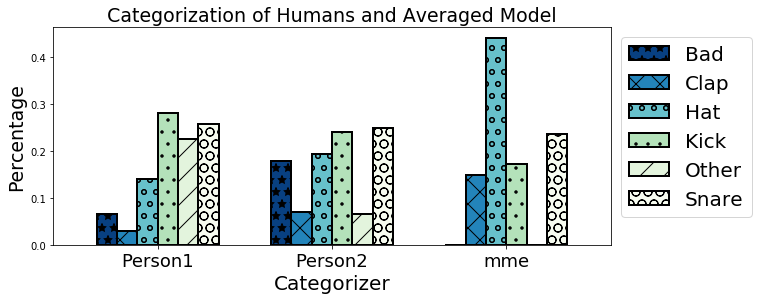

In [82]:

import matplotlib
import matplotlib.pyplot as plt

import matplotlib as mpl


from matplotlib import cm



bf=pd.DataFrame(columns=["categorizer","Bad","Clap","Hat","Kick","Other","Snare"],
               data=[p1,p2,mme])
bf=bf.set_index("categorizer")

c=cm.get_cmap("GnBu_r",10)



# plt.figure(figsize=(2,1))
ax=bf.plot(kind='bar',rot=0,color=c(np.linspace(0.05,1,6)),linewidth=2, width=0.7)
patterns =('-', '+', 'x','/','//','O','o','\\','\\\\')
bars = ax.patches
hatches = ''.join(h*len(bf) for h in ["*","x","o",".","/","O"])

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
    bar.set_edgecolor("black")
    bar.set_linewidth(2)
    
plt.gcf().set_size_inches(10, 4)
plt.legend(bbox_to_anchor=(1, 1),loc='upper left', ncol=1,prop={'size': 20},)
plt.ylabel("Percentage",fontsize=19)
plt.xlabel("Categorizer",fontsize=20)
plt.tick_params(axis='x', which='major', labelsize=18)
plt.title("Categorization of Humans and Averaged Model",fontsize=19)

plt.savefig("cat.pdf",bbox_inches='tight',dpi=1000)
